In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = './train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({
            'image': img_arr,
            'class': class_num
        })
print(len(TRAIN_DATA))



 16%|█▌        | 807/5000 [00:11<00:56, 74.36it/s]

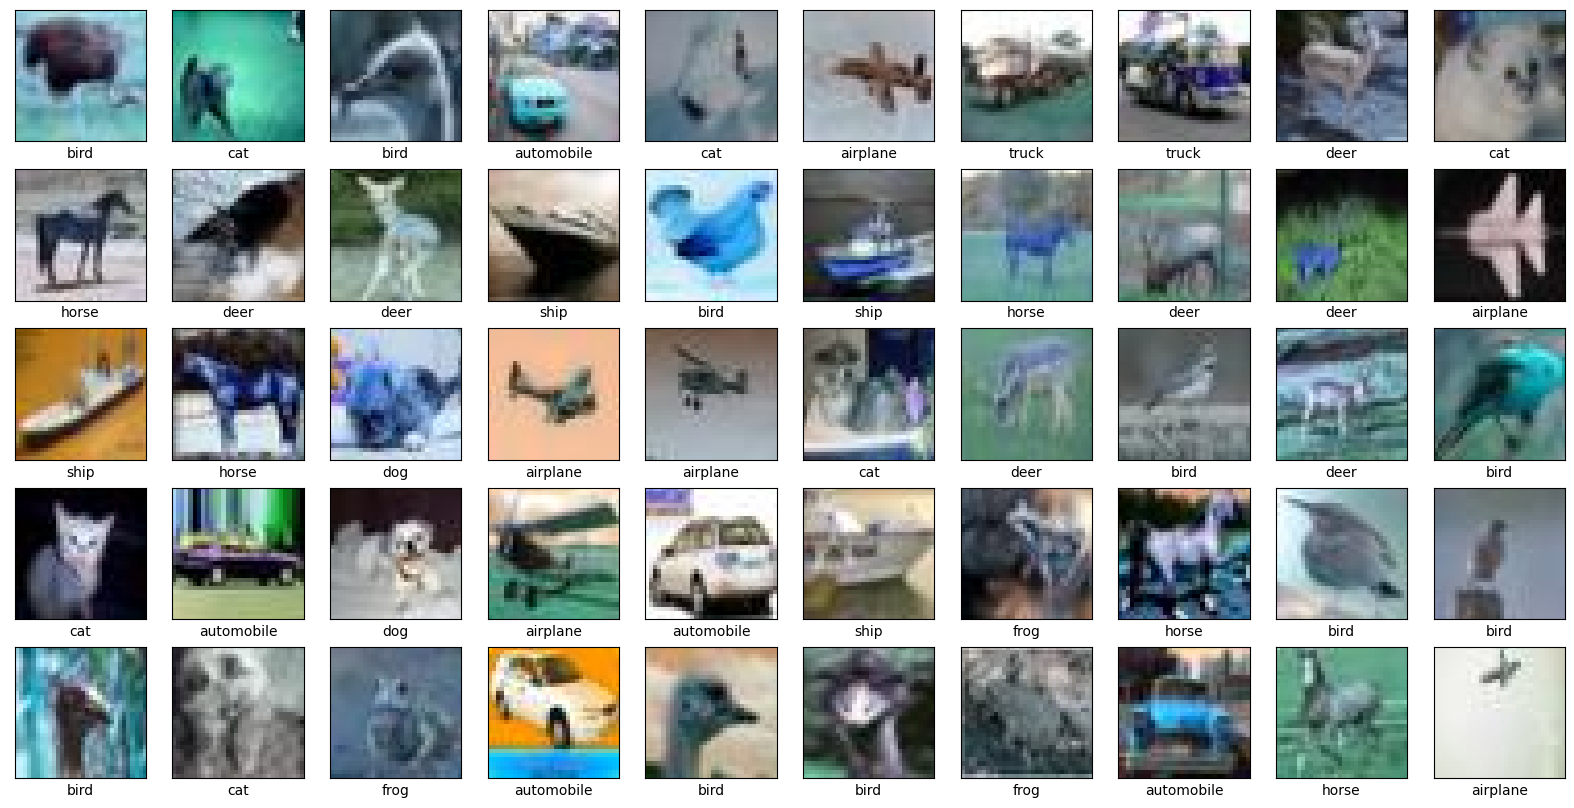

In [ ]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [ ]:
data_sets = TRAIN_DATA[0:5000]

X = [data_sets[i]['image'] for i in range(len(data_sets))]
y = [data_sets[i]['class'] for i in range(len(data_sets))]
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(5000, 32, 32, 3)
(5000,)


In [ ]:
def uclidis (x1,y1):
    return np.sqrt(np.sum((x1-y1)**2))

def manhattan(x1,y1):
    return np.sum(np.abs(x1-y1))


In [ ]:
def find_knn(trainning_data, validation_data, trainning_label, k, l_func):
    nearest_neigbour= []
    for i in tqdm(range (len(validation_data))):
        scores= []
        for j in range (len(trainning_data)):
            score=l_func(validation_data[i],trainning_data[j])
            scores.append({
                "score":score,
                "label":trainning_label[j]
            })
            
        scores.sort(key=lambda x:x["score"])
        nearest_neigbour.append(scores[:k])
    return nearest_neigbour


In [ ]:
def test_train_split(X,y,test_size=0.2):
    test_size=int(test_size*len(X))
    X_train=X[:-test_size]
    y_train=y[:-test_size]
    X_test=X[-test_size:]
    y_test=y[-test_size:]
    return X_train,y_train,X_test,y_test

In [ ]:
def predict(nearest_neigbour):
    y_pred = []

    for neighbor in nearest_neigbour:
        labels = [n['label'] for n in neighbor]
        y_pred.append(max(set(labels), key=labels.count))
    return y_pred


def accuracy(y_true,y_pred):
    return np.sum(y_true==y_pred)/len(y_true)


In [ ]:
X_train,y_train,X_test,y_test=test_train_split(X,y,test_size=0.2)

l1_accuracy = {}
l2_accuracy = {}
k_range = np.arange(1, 11, 1)

for k in tqdm(k_range):
    l2_neighbours=find_knn(X_train,X_test,y_train,k,uclidis)
    l1_neighbours=find_knn(X_train,X_test,y_train,k,manhattan)
    y_pred_l2=predict(l2_neighbours)
    y_pred_l1=predict(l1_neighbours)
    l2_accuracy[k]=accuracy(y_test,y_pred_l2)
    l1_accuracy[k]=accuracy(y_test,y_pred_l1)



100%|██████████| 10/10 [23:17<00:00, 139.79s/it]


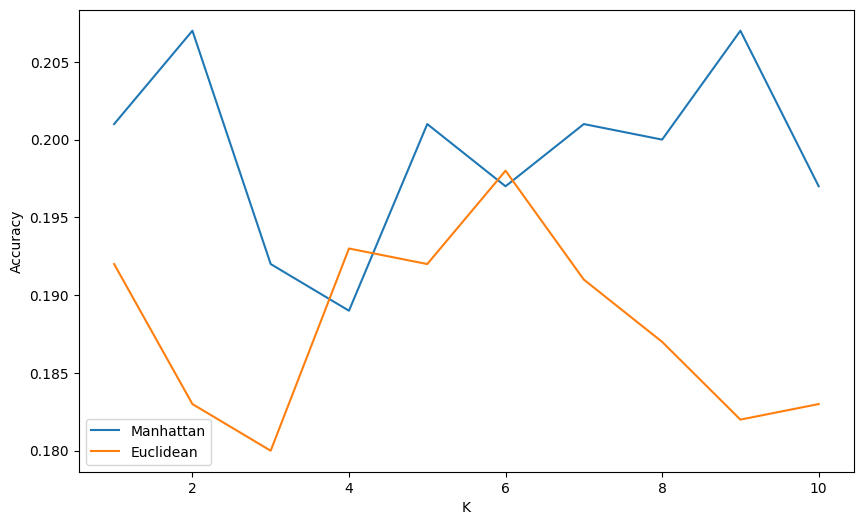

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, list(l1_accuracy.values()), label='Manhattan')
plt.plot(k_range, list(l2_accuracy.values()), label='Euclidean')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(
    ['Manhattan', 'Euclidean']
)
plt.show()